In [77]:
import numpy as np
import cv2
import pandas as pd
import os
from os import listdir
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import skimage
from sklearn.ensemble import RandomForestClassifier

PATH = "C:/Users/cubix/Desktop/analiza-obrazow-cyfrowych-projekt/data/DATASET/"
os.listdir(PATH)

['downdog', 'goddess', 'plank', 'tree', 'warrior']

In [ ]:
dataset = []
labels = []

for classes in os.listdir(PATH):
    for image in os.listdir(PATH + classes):
        img = cv2.imread(PATH + classes + '/' + image, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized = cv2.resize(img, (200, 200))
        flipped = cv2.flip(resized, 1)
        dataset.append(resized)
        dataset.append(flipped)
        labels.append(classes)
        labels.append(classes)

In [ ]:
dataset_array = np.asarray(dataset)
labels_array = np.asarray(labels)

In [ ]:
plt.imshow(dataset_array[1])
plt.show()

In [ ]:
plt.imshow(dataset_array[0])
plt.show()

In [ ]:
dataset_array.shape

In [ ]:
hog_list = []

for sample in range(len(dataset_array)):
    fd, hog_sample = hog(dataset_array[sample], orientations=9, pixels_per_cell=(6, 6), #to run faster make pixels_per_cell and cells_per_block = 6, 6
                        cells_per_block=(3, 3), visualize=True, channel_axis=-1) #channel_axis = -1 if RGB, else None
    hog_list.append(hog_sample)
    if not sample % 5: print(sample)

In [ ]:
plt.axis("off")
plt.imshow(hog_list[0], cmap="turbo")
plt.show()

In [ ]:
labels_encoded = OneHotEncoder().fit_transform(np.reshape(labels_array, newshape=(len(labels_array), 1))).toarray()

In [ ]:
hog_array = np.asarray(hog_list)
hog_array = np.reshape(hog_array, newshape=(hog_array.shape[0], hog_array.shape[1] * hog_array.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(hog_array, labels_array, test_size=0.2,)
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cm, display_labels=os.listdir(PATH))
display.plot()
plt.show()

In [ ]:
print(balanced_accuracy_score(y_test, y_pred))

In [ ]:
hog_array = np.asarray(hog_list)
hog_array = np.reshape(hog_array, newshape=(hog_array.shape[0], hog_array.shape[1] * hog_array.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(hog_array, labels_array, test_size=0.2,)
tree = RandomForestClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cm, display_labels=os.listdir(PATH))
display.plot()
plt.show()

In [73]:
canny_list = []

for sample in range(len(dataset_array)):
    gray_img = cv2.cvtColor(dataset_array[sample], cv2.COLOR_RGB2GRAY)
    new_img = skimage.feature.canny((gray_img))
    canny_list.append(new_img)
    # if not sample % 5: print(sample)

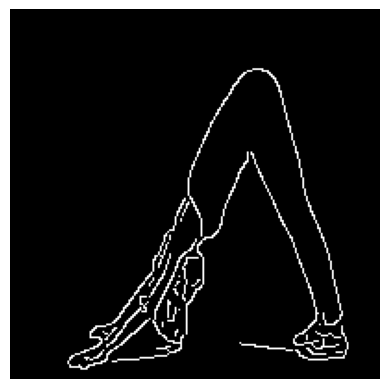

In [74]:
plt.axis("off")
plt.imshow(canny_list[0], cmap="gray")
plt.show()

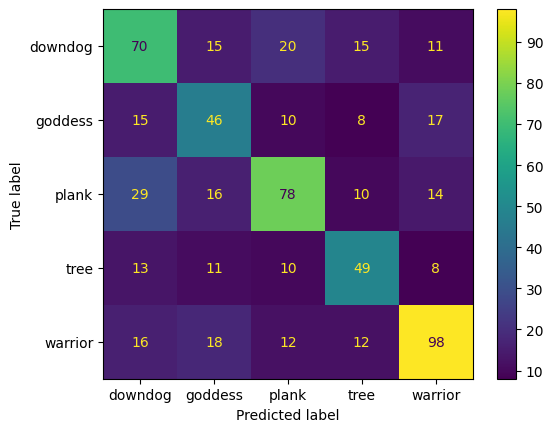

In [75]:
canny_array = np.asarray(canny_list)
canny_array = np.reshape(canny_array, newshape=(canny_array.shape[0], canny_array.shape[1] * canny_array.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(canny_array, labels_array, test_size=0.2,)
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cm, display_labels=os.listdir(PATH))
display.plot()
plt.show()

In [76]:
print(balanced_accuracy_score(y_test, y_pred))

0.5421593446538922


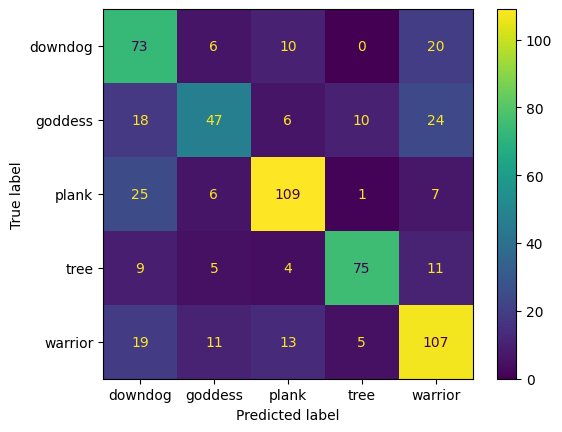

In [82]:
canny_array = np.asarray(canny_list)
canny_array = np.reshape(canny_array, newshape=(canny_array.shape[0], canny_array.shape[1] * canny_array.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(canny_array, labels_array, test_size=0.2,)
tree = RandomForestClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cm, display_labels=os.listdir(PATH))
display.plot()
plt.show()

In [83]:
print(balanced_accuracy_score(y_test, y_pred))

0.6530613463093486
